# РК ИУ5

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [2]:
data = pd.read_csv('restaurant-scores-lives-standard.csv')

In [3]:
data['business_latitude'] = data['business_latitude'].replace(0,np.nan)
data['business_latitude'] = data['business_latitude'].fillna(data['business_latitude'].mean())
data['Zip Codes'] = data['Zip Codes'].replace(0,np.nan)
data['Zip Codes'] = data['Zip Codes'].fillna(data['Zip Codes'].mean())
data['Supervisor Districts'] = data['Supervisor Districts'].replace(0,np.nan)
data['Supervisor Districts'] = data['Supervisor Districts'].fillna(data['Supervisor Districts'].mean())

In [4]:
data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,37.771619,NaN,NaN,1.415043e+10,...,New Ownership,NaN,NaN,NaN,NaN,NaN,7.086535,NaN,20035.113353,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,37.771619,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,7.086535,NaN,20035.113353,NaN
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,37.771619,NaN,NaN,NaN,...,New Ownership,NaN,NaN,NaN,NaN,NaN,7.086535,NaN,20035.113353,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,37.771619,NaN,NaN,1.415488e+10,...,New Construction,NaN,NaN,NaN,NaN,NaN,7.086535,NaN,20035.113353,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,37.771619,NaN,NaN,NaN,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,7.086535,NaN,20035.113353,NaN


In [5]:
data.dtypes

business_id                    int64
business_name                 object
business_address              object
business_city                 object
business_state                object
business_postal_code          object
business_latitude            float64
business_longitude           float64
business_location             object
business_phone_number        float64
inspection_id                 object
inspection_date               object
inspection_score             float64
inspection_type               object
violation_id                  object
violation_description         object
risk_category                 object
Neighborhoods (old)          float64
Police Districts             float64
Supervisor Districts         float64
Fire Prevention Districts    float64
Zip Codes                    float64
Analysis Neighborhoods       float64
dtype: object

In [6]:
data.isnull().sum()
# проверим есть ли пропущенные значения

business_id                      0
business_name                    0
business_address                 0
business_city                    0
business_state                   0
business_postal_code          1018
business_latitude                0
business_longitude           19556
business_location            19556
business_phone_number        36938
inspection_id                    0
inspection_date                  0
inspection_score             13610
inspection_type                  0
violation_id                 12870
violation_description        12870
risk_category                12870
Neighborhoods (old)          19594
Police Districts             19594
Supervisor Districts             0
Fire Prevention Districts    19646
Zip Codes                        0
Analysis Neighborhoods       19594
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   business_id                53973 non-null  int64  
 1   business_name              53973 non-null  object 
 2   business_address           53973 non-null  object 
 3   business_city              53973 non-null  object 
 4   business_state             53973 non-null  object 
 5   business_postal_code       52955 non-null  object 
 6   business_latitude          53973 non-null  float64
 7   business_longitude         34417 non-null  float64
 8   business_location          34417 non-null  object 
 9   business_phone_number      17035 non-null  float64
 10  inspection_id              53973 non-null  object 
 11  inspection_date            53973 non-null  object 
 12  inspection_score           40363 non-null  float64
 13  inspection_type            53973 non-null  obj

In [8]:
data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,37.771619,NaN,NaN,1.415043e+10,...,New Ownership,NaN,NaN,NaN,NaN,NaN,7.086535,NaN,20035.113353,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,37.771619,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,7.086535,NaN,20035.113353,NaN
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,37.771619,NaN,NaN,NaN,...,New Ownership,NaN,NaN,NaN,NaN,NaN,7.086535,NaN,20035.113353,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,37.771619,NaN,NaN,1.415488e+10,...,New Construction,NaN,NaN,NaN,NaN,NaN,7.086535,NaN,20035.113353,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,37.771619,NaN,NaN,NaN,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,7.086535,NaN,20035.113353,NaN


<AxesSubplot:>

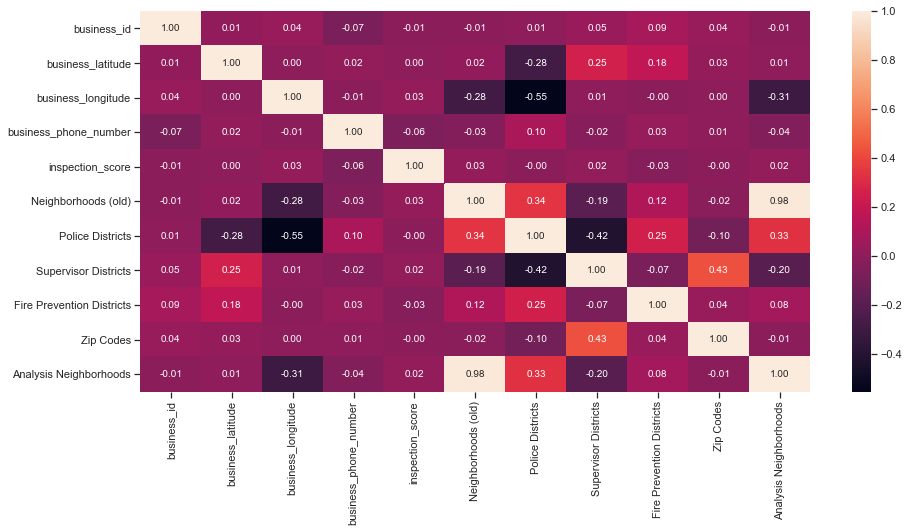

In [9]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [10]:
X = data[["business_latitude","Zip Codes"]].astype(int)
Y = data["Supervisor Districts"].astype(int)
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    business_latitude  Zip Codes
0                 37      20035
1                 37      20035
2                 37      20035
3                 37      20035
4                 37      20035 

Выходные данные:

 0    7
1    7
2    7
3    7
4    7
Name: Supervisor Districts, dtype: int64


In [11]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

        business_latitude  Zip Codes
24563                 37         56
19664                 37      28858
37837                 37      28858
33205                 37      20035
42332                 37      28859 

Входные параметры тестовой выборки:

        business_latitude  Zip Codes
26331                 37      28859
23548                 37      28859
51798                 37      28862
34929                 37      20035
13447                 37      20035 

Выходные параметры обучающей выборки:

 24563    11
19664     1
37837    10
33205     7
42332     7
Name: Supervisor Districts, dtype: int64 

Выходные параметры тестовой выборки:

 26331    7
23548    7
51798    5
34929    7
13447    7
Name: Supervisor Districts, dtype: int64


In [12]:
from sklearn.svm import SVC , LinearSVC
from sklearn.pipeline import make_pipeline
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [15]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 0.5076807798166314
Средняя квадратичная ошибка: 1.757219197347261
Median absolute error: 0.06266219287253794
Коэффициент детерминации: 0.7249758023646331


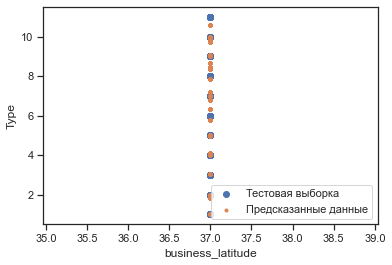

In [16]:
plt.scatter(X_test.business_latitude, Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.business_latitude, Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('business_latitude')
plt.ylabel('Type')
plt.show()

In [17]:
svc = clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc.fit(X_train,Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [18]:
pred_y = svc.predict(X_test)

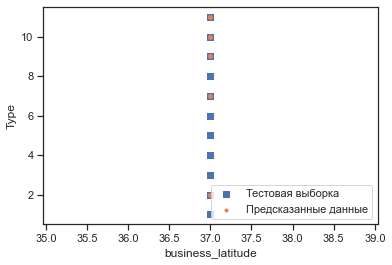

In [19]:
plt.scatter(X_test.business_latitude, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.business_latitude, pred_y, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('business_latitude')
plt.ylabel ('Type')
plt.show()